In [3]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

import matplotlib.cm as cm
    
import sys  
sys.path.insert(0, '../src/')

from astropy.table import Table

from jsm_routines import SHMF, CSMF, SHMR
import os

In [2]:
acc_data = np.load("../../data/12_4_0/numpy/acc_mass.npy")

surv_data = np.load("../../data/12_4_0/numpy/surv_mass.npy")

as_data = np.load("../../data/12_4_0/numpy/acc_surv_mass.npy")

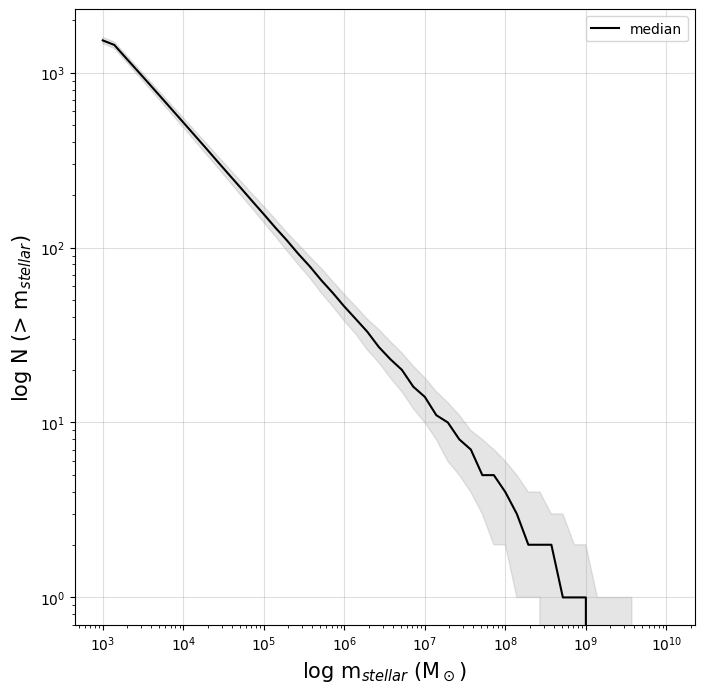

In [4]:
acc_massr, acc_CSMF = CSMF(SHMR(acc_data))

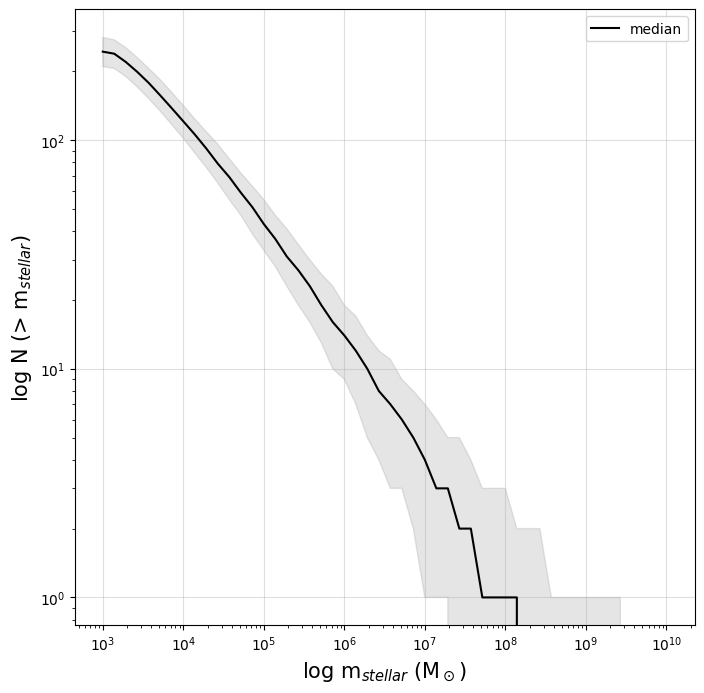

In [5]:
as_massr, as_CSMF = CSMF(SHMR(as_data))

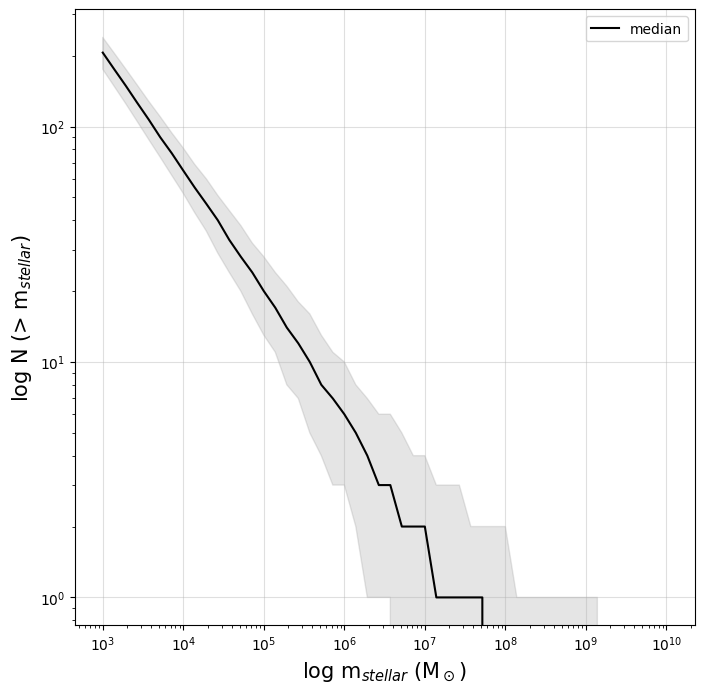

In [6]:
surv_massr, surv_CSMF = CSMF(SHMR(surv_data))

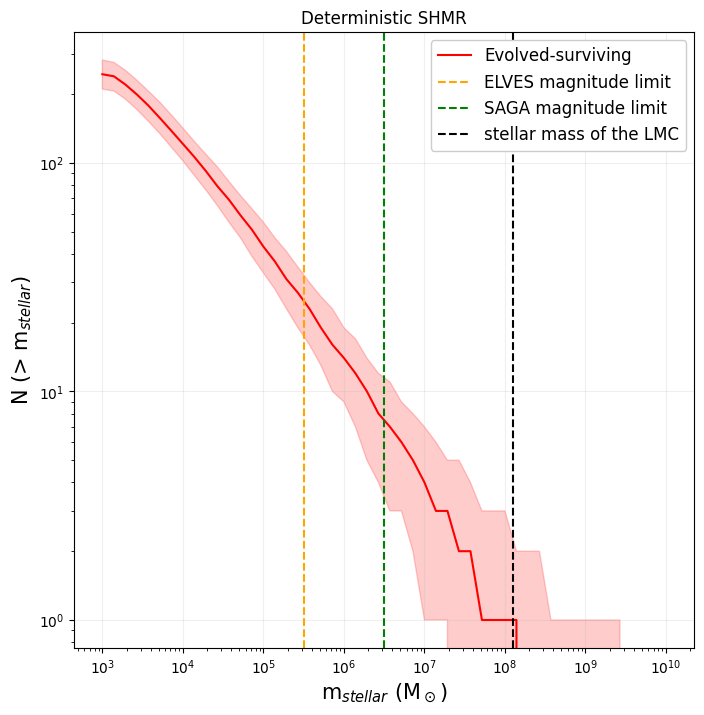

In [12]:
plt.figure(figsize=(8, 8))

plt.title("Deterministic SHMR")
#plt.plot(acc_massr, acc_CSMF[1, :], label="Unevolved", color="black")
#plt.fill_between(acc_massr, y1=acc_CSMF[0, :], y2=acc_CSMF[2, :], alpha=0.2, color="black")

plt.plot(as_massr, as_CSMF[1, :], label="Evolved-surviving", color="red")
plt.fill_between(as_massr, y1=as_CSMF[0, :], y2=as_CSMF[2, :], alpha=0.2, color="red")

#plt.plot(as_massr, as_CSMF[1, :], label="Unevolved-surviving", color="navy")
#plt.fill_between(as_massr, y1=as_CSMF[0, :], y2=as_CSMF[2, :], alpha=0.2, color="navy")


plt.axvline(10**5.5, ls="--", color='orange', label="ELVES magnitude limit")
plt.axvline(10**6.5, ls="--", color='green', label="SAGA magnitude limit")
plt.axvline(10**8.1, ls="--", color='black', label="stellar mass of the LMC")


plt.xscale("log")
plt.yscale("log")


plt.xlabel("m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.ylabel("N (> m$_{stellar}$)", fontsize=15)
#plt.xlim(3.05)
plt.legend(fontsize=12, framealpha=1)
plt.grid(alpha=0.2)
plt.savefig("../figures/determ_CSMF.png")

plt.show()
